<a href="https://colab.research.google.com/github/pankSg/deep_learning/blob/main/NN_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This example trains a neural network model to classify images of hand written digits from 0 to 9. It is a multiclass classification problem with 10 classes implemented using Deep Learning in Tensorflow and Keras

In [ ]:
# import the requried libraries
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Load the MNIST(Modified National Institute of Standards and Technology) data
mnist = tf.keras.datasets.mnist
mnistData = mnist.load_data()

In [ ]:
# Split the data into traning and test set
(X_train, y_train), (X_test, y_test) = mnistData

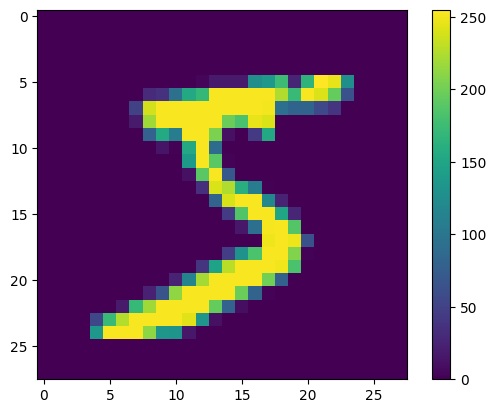

In [ ]:
# Visualize one training data
# The data must be preprocessed before traning the network.
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.show()

In [ ]:
# Preprocess the data
# The images are 28x28 Numpy arrays, with pixel values ranging from 0 to 255.
# Scales these values to a range of 0 to 1 before feeding them to the nerual network model.
X_train, X_test = X_train / 255.0, X_test /255.0

In [ ]:
# Define or Create the model
# The Keras Sequential API is a simple way to create neural network model in keras.
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
# Compile the model
# SGD (Stochastic Gradient Descent) is a type of optimization algorithm used in neural networks
# Sparse categorical cross-entropy is a loss function used in nerual networks for multiclass classification problems
# using accuracy metrics as the measure of performance.
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train or fit the model
# epoch refers to a single pass or iteration through the entire training dataset during the traning process
# validation_split is an argument in Keras that specifies the fraction of the training data that should be used as a validation set
model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.7019 - accuracy: 0.8175 - val_loss: 0.3661 - val_accuracy: 0.9034
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3703 - accuracy: 0.8962 - val_loss: 0.2970 - val_accuracy: 0.9184
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3143 - accuracy: 0.9112 - val_loss: 0.2634 - val_accuracy: 0.9263
Epoch 4/5
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2784 - accuracy: 0.9217 - val_loss: 0.2372 - val_accuracy: 0.9359
Epoch 5/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2533 - accuracy: 0.9281 - val_loss: 0.2190 - val_accuracy: 0.9408


In [ ]:
# Evaluate the model
# checking how the model performs on the test dataset
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test accurracy:', test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.2178 - accuracy: 0.9398
Test accurracy: 0.9398000240325928


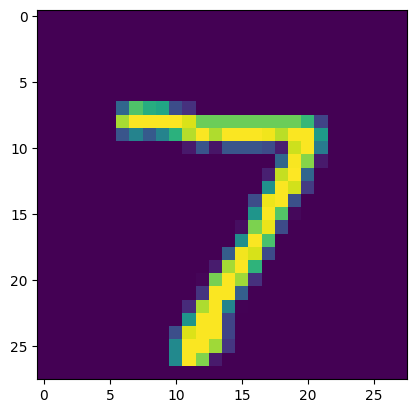

In [ ]:
# Pick and visualise a single test image from test data
single_test_image = X_test[0]
single_test_image = np.array(single_test_image, dtype='float')
plt.imshow(single_test_image)
plt.show()


In [ ]:
# Predict the test data using the model
# np.expand_dims is a function in NumPy that allows you to add an extra dimension to an existing array.
single_test_image = (np.expand_dims(single_test_image, 0))
pred = model.predict(single_test_image)
digit_value = np.argmax(pred[0])
digit_value

1/1 [==============================] - 0s 99ms/step


7

In [ ]:
# save the model for latter use
# model.save is a method in Keras that allows you to save the architecture, weights,
# and optimizer state of a trained neural network model to disk
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
